In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from scipy.stats import pearsonr

def simulate_flips(n, p=0.6):
    sim = np.zeros(n)
    for _ in range(n):
# [Jing]       print(np.random.rand())
        sim[_] = 1 if np.random.rand() < p else 0 # random.rand()=generate one random value in a given shape.
    return sim
        
coin_data = simulate_flips(100)
coin_data[:10]

array([1., 1., 1., 0., 1., 1., 0., 1., 1., 1.])

In [3]:
sum(coin_data) / 100  #always fluctuation in the random simulations

0.59

In [9]:
# math formula of MLE: log(p^H (1-p)^(N - H)) = H log(p) + (N-H) log(1-p): 
# where p is the probability of running heads (bias), H is the number of heads, N is the number of tosses

def log_lk(p, data=coin_data):
    heads = sum(data)
    tails = data.shape[0] - heads #shape[0] returns the dimensions of the array, here is 100 tosses.
    ans = heads*np.log(p) + tails*np.log(1-p) # the math formula as before
    return ans

log_lk(0.6) # WHY?

-64.86837605227666

p_range= [0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89]


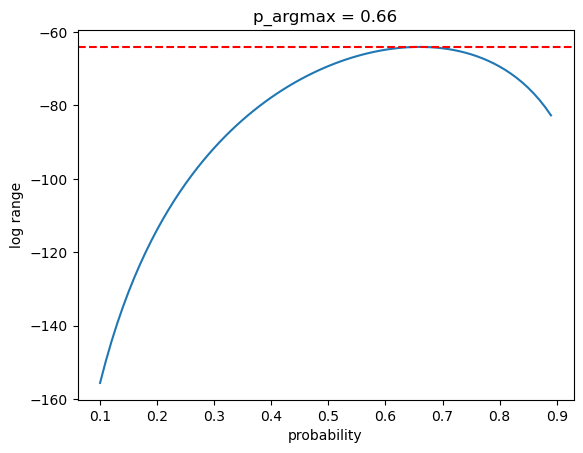

In [10]:
p_range = np.arange(.1, .9, 0.01) # specify the start, stop, and step values, such as array = np. arange(start=0, stop=10, step=2)

#[Jing]
print(f'p_range= {p_range}')

def get_log_lk_range(log_lk_func, p_range=p_range, plot=True):
    p_range = np.arange(.1, .9, 0.01)
    ans = [log_lk_func(p) for p in p_range]
    log_lk_argmax = np.argmax(ans) #returns indices of the max element of the array in a particular axis
    p_argmax = p_range[log_lk_argmax]
    if plot:
        fig, ax = plt.subplots()
        ax.plot(p_range, ans)
        ax.set_title(f'p_argmax = {round(p_argmax, 2)}')
        plt.xlabel ("probability")
        plt.ylabel ("log range")
        plt.axhline(ans[log_lk_argmax], ls='--', c='r')
    return ans, log_lk_argmax

log_lk_range, p_argmax = get_log_lk_range(log_lk); # log_lk function is a parameter

In [14]:
def estimate_accuracy(log_lk_range, p_argmax):
    diff1_log_lk = np.diff(log_lk_range) / 0.01 #Calculate the n-th discrete difference along the given axis. Why?
    diff2_log_lk = np.diff(diff1_log_lk) / 0.01
    return 1/np.sqrt(-diff2_log_lk[p_argmax])

estimate_accuracy(log_lk_range, p_argmax) # accuracy standard deviation

0.048780965636817865